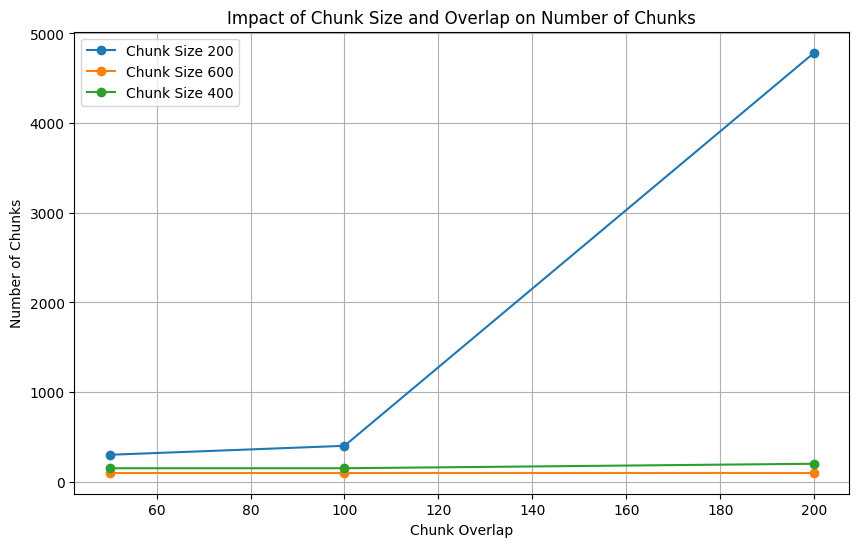

In [ ]:
import matplotlib.pyplot as plt
from langchain.schema.document import Document
from langchain.text_splitter import RecursiveCharacterTextSplitter


def split_documents_with_params(documents, chunk_size, chunk_overlap):
    """Split documents using specified chunk size and overlap."""
    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=chunk_size,
        chunk_overlap=chunk_overlap,
        length_function=len,
        is_separator_regex=False
    )
    return text_splitter.split_documents(documents)

def experiment_with_chunking(documents, chunk_sizes, overlaps):
    """Run experiments with different chunk sizes and overlaps."""
    results = []
    for chunk_size in chunk_sizes:
        for overlap in overlaps:
            chunks = split_documents_with_params(documents, chunk_size, overlap)
            results.append({
                "chunk_size": chunk_size,
                "chunk_overlap": overlap,
                "num_chunks": len(chunks)
            })
    return results

def plot_results(results):
    """Plot the results of chunking experiments."""
    fig, ax = plt.subplots(figsize=(10, 6))
    for chunk_size in set(result["chunk_size"] for result in results):
        overlaps = [res["chunk_overlap"] for res in results if res["chunk_size"] == chunk_size]
        num_chunks = [res["num_chunks"] for res in results if res["chunk_size"] == chunk_size]
        ax.plot(overlaps, num_chunks, marker='o', label=f"Chunk Size {chunk_size}")

    ax.set_title("Impact of Chunk Size and Overlap on Number of Chunks")
    ax.set_xlabel("Chunk Overlap")
    ax.set_ylabel("Number of Chunks")
    ax.legend()
    plt.grid(True)
    plt.show()

# Main execution
if __name__ == "__main__":
    # Generate dummy documents
    documents = generate_dummy_documents()

    # Define chunk sizes and overlaps to test
    chunk_sizes = [200, 400, 600]
    overlaps = [50, 100, 200]

    # Run experiments
    results = experiment_with_chunking(documents, chunk_sizes, overlaps)

    # Plot the results
    plot_results(results)


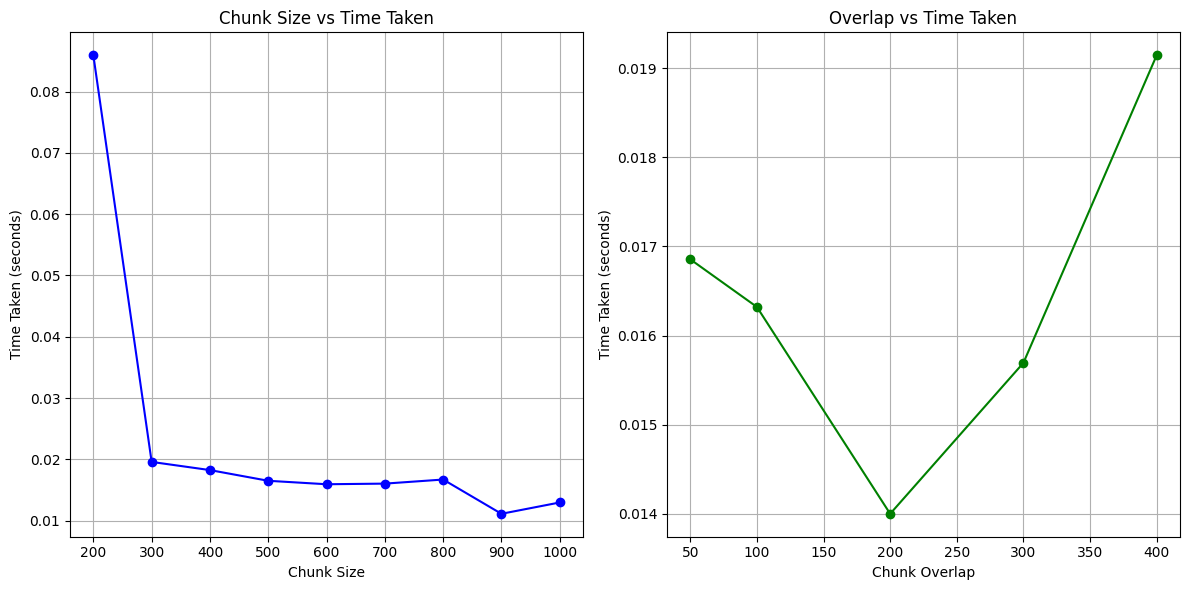

In [ ]:
import matplotlib.pyplot as plt
import time
from langchain.schema.document import Document
from langchain.text_splitter import RecursiveCharacterTextSplitter

# Dummy function to simulate loading documents
def generate_dummy_documents(num_docs=5, pages=10):
    """Generate dummy documents for testing."""
    documents = []
    for doc_id in range(num_docs):
        for page in range(1, pages + 1):
            text = f"This is sample text for document {doc_id}, page {page}. " * 20
            documents.append(Document(page_content=text, metadata={"source": f"doc_{doc_id}", "page": page}))
    return documents

def split_documents_with_params(documents, chunk_size, chunk_overlap):
    """Split documents using specified chunk size and overlap."""
    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=chunk_size,
        chunk_overlap=chunk_overlap,
        length_function=len,
        is_separator_regex=False
    )
    return text_splitter.split_documents(documents)

def measure_split_time(documents, chunk_sizes, overlaps):
    """Measure time taken for splitting with various chunk sizes and overlaps."""
    results = {"chunk_size_vs_time": [], "overlap_vs_time": []}

    # Measure time for varying chunk sizes (fixed overlap)
    fixed_overlap = overlaps[len(overlaps) // 2]
    for chunk_size in chunk_sizes:
        start_time = time.time()
        split_documents_with_params(documents, chunk_size, fixed_overlap)
        end_time = time.time()
        results["chunk_size_vs_time"].append((chunk_size, end_time - start_time))

    # Measure time for varying overlaps (fixed chunk size)
    fixed_chunk_size = chunk_sizes[len(chunk_sizes) // 2]
    for overlap in overlaps:
        start_time = time.time()
        split_documents_with_params(documents, fixed_chunk_size, overlap)
        end_time = time.time()
        results["overlap_vs_time"].append((overlap, end_time - start_time))

    return results

def plot_time_results(results):
    """Plot time results for chunk size and overlap."""
    # Extract data
    chunk_sizes, chunk_times = zip(*results["chunk_size_vs_time"])
    overlaps, overlap_times = zip(*results["overlap_vs_time"])

    # Plot Chunk Size vs Time
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(chunk_sizes, chunk_times, marker='o', color='blue')
    plt.title("Chunk Size vs Time Taken")
    plt.xlabel("Chunk Size")
    plt.ylabel("Time Taken (seconds)")
    plt.grid(True)

    # Plot Overlap vs Time
    plt.subplot(1, 2, 2)
    plt.plot(overlaps, overlap_times, marker='o', color='green')
    plt.title("Overlap vs Time Taken")
    plt.xlabel("Chunk Overlap")
    plt.ylabel("Time Taken (seconds)")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Generate dummy documents
    documents = generate_dummy_documents()

    # Define chunk sizes and overlaps to test
    chunk_sizes = [200,300, 400,500, 600,700, 800,900, 1000]
    overlaps = [50, 100, 200, 300, 400]

    # Measure time for splitting
    results = measure_split_time(documents, chunk_sizes, overlaps)

    # Plot results
    plot_time_results(results)


#### While vecotorisation

In [1]:
from rag_agent import load_documents, split_docs, embed_to_chromaDB

c:\Users\ykkan\OneDrive\Desktop\GEN AI projects\Local RAG Agnet Combined\rag_agent.py:58: LangChainDeprecationWarning: The class `OllamaEmbeddings` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaEmbeddings``.
  return OllamaEmbeddings(model="nomic-embed-text")


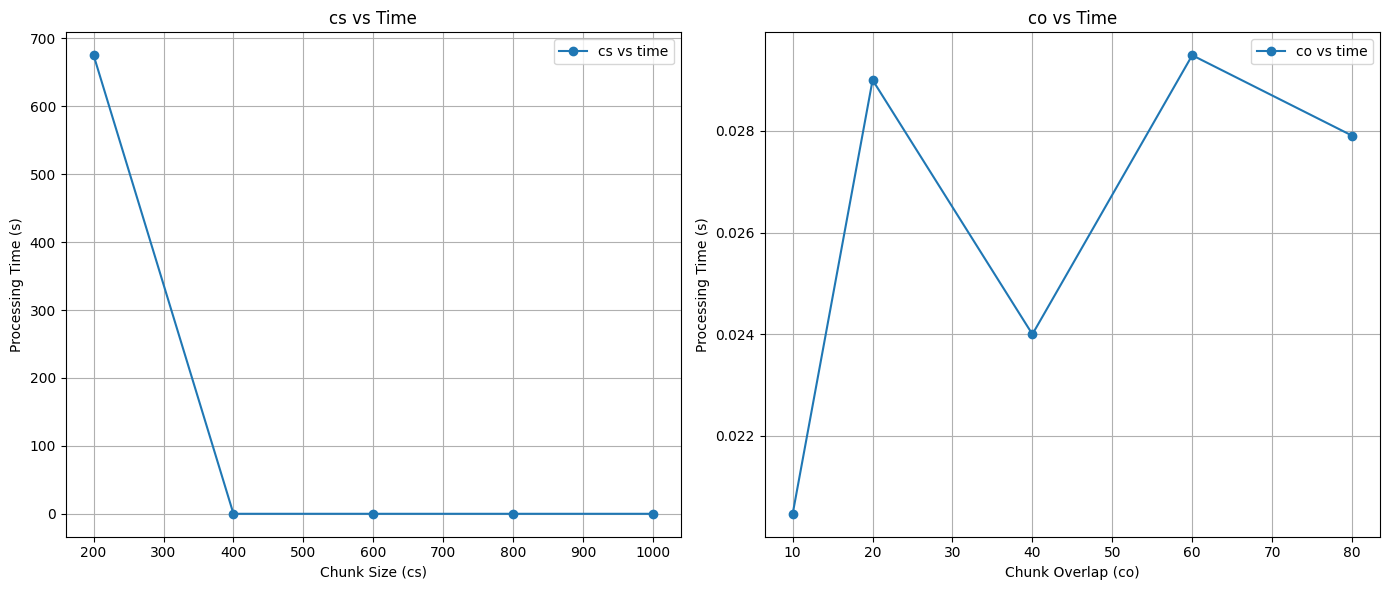

In [2]:
import time
import matplotlib.pyplot as plt

def analyze_processing_time(data_path, cs_values, co_values):
    """
    Measure processing time for varying chunk size (cs) and chunk overlap (co) 
    and plot the results.
    """
    cs_times = []
    co_times = []

    documents = load_documents(data_path=data_path)

    for cs in cs_values:
        start_time = time.time()
        chunks = split_docs(documents, cs=cs, co=80)  # Fixed co
        embed_to_chromaDB(chunks)
        processing_time = time.time() - start_time
        cs_times.append(processing_time)

    # Measure time for varying `co` with fixed `cs`
    for co in co_values:
        start_time = time.time()
        chunks = split_docs(documents, cs=400, co=co)  # Fixed cs
        embed_to_chromaDB(chunks)
        processing_time = time.time() - start_time
        co_times.append(processing_time)

    # Plotting results
    plt.figure(figsize=(14, 6))

    # cs vs time plot
    plt.subplot(1, 2, 1)
    plt.plot(cs_values, cs_times, marker='o', label="cs vs time")
    plt.xlabel('Chunk Size (cs)')
    plt.ylabel('Processing Time (s)')
    plt.title('cs vs Time')
    plt.grid(True)
    plt.legend()

    # co vs time plot
    plt.subplot(1, 2, 2)
    plt.plot(co_values, co_times, marker='o', label="co vs time")
    plt.xlabel('Chunk Overlap (co)')
    plt.ylabel('Processing Time (s)')
    plt.title('co vs Time')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage
cs_values = [200, 400, 600, 800, 1000]
co_values = [10, 20, 40, 60, 80]

analyze_processing_time(data_path="data", cs_values=cs_values, co_values=co_values)


In [ ]:
# It was final